### Fitxer de prova

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset principal de solicitudes de adelanto en efectivo
cash_request = pd.read_csv('../data/extract - cash request - data analyst.csv')

# Inspeccionar la estructura y el tipo de datos de 'cash_request'
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [2]:
# Crear una copia del DataFrame para preservar el original
cr = cash_request.copy()
# Filtrar columnas relevantes para el análisis
cr = cr[["amount", "created_at", "user_id", "deleted_account_id","transfer_type"]]
cr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount              23970 non-null  float64
 1   created_at          23970 non-null  object 
 2   user_id             21867 non-null  float64
 3   deleted_account_id  2104 non-null   float64
 4   transfer_type       23970 non-null  object 
dtypes: float64(3), object(2)
memory usage: 936.5+ KB


In [3]:
# Convertir 'created_at' a tipo datetime para manipulación de fechas
cr['created_at'] = pd.to_datetime(cr['created_at'])
cr.head()


,amount,created_at,user_id,deleted_account_id,transfer_type
0,100.0,2019-12-10 19:05:21.596873+00:00,804.0,NaN,regular
1,100.0,2019-12-10 19:50:12.347780+00:00,231.0,NaN,regular
2,100.0,2019-12-10 19:13:35.825460+00:00,191.0,NaN,regular
3,99.0,2019-12-10 19:16:10.880172+00:00,761.0,NaN,regular
4,100.0,2020-05-06 09:59:38.877376+00:00,7686.0,NaN,regular


In [4]:
# Convertir la columna 'created_at' a una fecha sin zona horaria
cr['created_at'] = cr['created_at'].dt.tz_localize(None)
#cr['created_at_notz'] = cr['created_at'].dt.tz_localize(None)
cr.head()

,amount,created_at,user_id,deleted_account_id,transfer_type
0,100.0,2019-12-10 19:05:21.596873,804.0,NaN,regular
1,100.0,2019-12-10 19:50:12.347780,231.0,NaN,regular
2,100.0,2019-12-10 19:13:35.825460,191.0,NaN,regular
3,99.0,2019-12-10 19:16:10.880172,761.0,NaN,regular
4,100.0,2020-05-06 09:59:38.877376,7686.0,NaN,regular


In [5]:
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()


,amount,created_at,user_id,deleted_account_id,transfer_type,Mes
0,100.0,2019-12-10 19:05:21.596873,804.0,NaN,regular,2019-12
1,100.0,2019-12-10 19:50:12.347780,231.0,NaN,regular,2019-12
2,100.0,2019-12-10 19:13:35.825460,191.0,NaN,regular,2019-12
3,99.0,2019-12-10 19:16:10.880172,761.0,NaN,regular,2019-12
4,100.0,2020-05-06 09:59:38.877376,7686.0,NaN,regular,2020-05


In [6]:
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
#cr['Cohorte'] = cr.groupby('user_id')['created_at_notz'].transform('min').dt.to_period('M')
cr.head(10)

,amount,created_at,user_id,deleted_account_id,transfer_type,Mes,Cohorte
0,100.0,2019-12-10 19:05:21.596873,804.0,NaN,regular,2019-12,2019-12
1,100.0,2019-12-10 19:50:12.347780,231.0,NaN,regular,2019-12,2019-12
2,100.0,2019-12-10 19:13:35.825460,191.0,NaN,regular,2019-12,2019-12
3,99.0,2019-12-10 19:16:10.880172,761.0,NaN,regular,2019-12,2019-12
4,100.0,2020-05-06 09:59:38.877376,7686.0,NaN,regular,2020-05,2020-05
5,100.0,2020-05-23 20:58:55.129432,9489.0,NaN,regular,2020-05,2020-05
6,100.0,2020-06-16 17:07:38.452652,14631.0,NaN,regular,2020-06,2020-06
7,100.0,2020-02-10 01:11:53.808270,NaN,309.0,regular,2020-02,NaT
8,100.0,2020-06-28 12:06:33.712840,NaN,2499.0,regular,2020-06,NaT
9,90.0,2019-12-10 19:51:23.911206,897.0,NaN,regular,2019-12,2019-12


In [7]:
# Calcular el número inicial de clientes únicos en cada cohorte
cohort_sizes_initial = cr.groupby('Cohorte').agg(Num_Clientes_Iniciales=('user_id', 'nunique')).reset_index()
cohort_sizes_initial


,Cohorte,Num_Clientes_Iniciales
0,2019-11,1
1,2019-12,204
2,2020-01,90
3,2020-02,84
4,2020-03,69
5,2020-04,212
6,2020-05,369
7,2020-06,1338
8,2020-07,1294
9,2020-08,656


In [8]:
# Calcular la cantidad de clientes únicos en cada cohorte para cada mes
cohort_sizes_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly

,Cohorte,Mes,Num_Clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,660
79,2020-09,2020-11,20
80,2020-10,2020-10,4694
81,2020-10,2020-11,15


In [9]:
# Calcular la cantidad de solicitudes de adelanto de efectivo de los clientes de cada cohorte en cada mes
cohort_cash_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Solicitudes=('user_id', 'count')).reset_index()
cohort_cash_monthly

,Cohorte,Mes,Num_Solicitudes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,707
79,2020-09,2020-11,20
80,2020-10,2020-10,4928
81,2020-10,2020-11,15


In [10]:
# Calcular la tasa de retención de clientes (clientes únicos por cohorte en cada mes / clientes iniciales de la cohorte)
retention_clientes = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Clientes')
retention_clientes = retention_clientes.div(cohort_sizes_initial.set_index('Cohorte')['Num_Clientes_Iniciales'], axis=0)
retention_clientes

Mes,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
2019-12,NaN,1.0,0.338235,0.215686,0.274510,0.259804,0.323529,0.289216,0.254902,0.308824,0.205882,0.289216,0.004902
2020-01,NaN,NaN,1.000000,0.211111,0.155556,0.300000,0.255556,0.266667,0.300000,0.233333,0.222222,0.255556,0.011111
2020-02,NaN,NaN,NaN,1.000000,0.523810,0.488095,0.488095,0.452381,0.428571,0.428571,0.297619,0.416667,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.507246,0.463768,0.594203,0.434783,0.405797,0.376812,0.391304,0.014493
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.490566,0.509434,0.396226,0.358491,0.311321,0.278302,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.615176,0.536585,0.452575,0.346883,0.401084,0.008130
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.520927,0.515695,0.403587,0.405082,0.002990
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.499227,0.374034,0.394900,0.005410


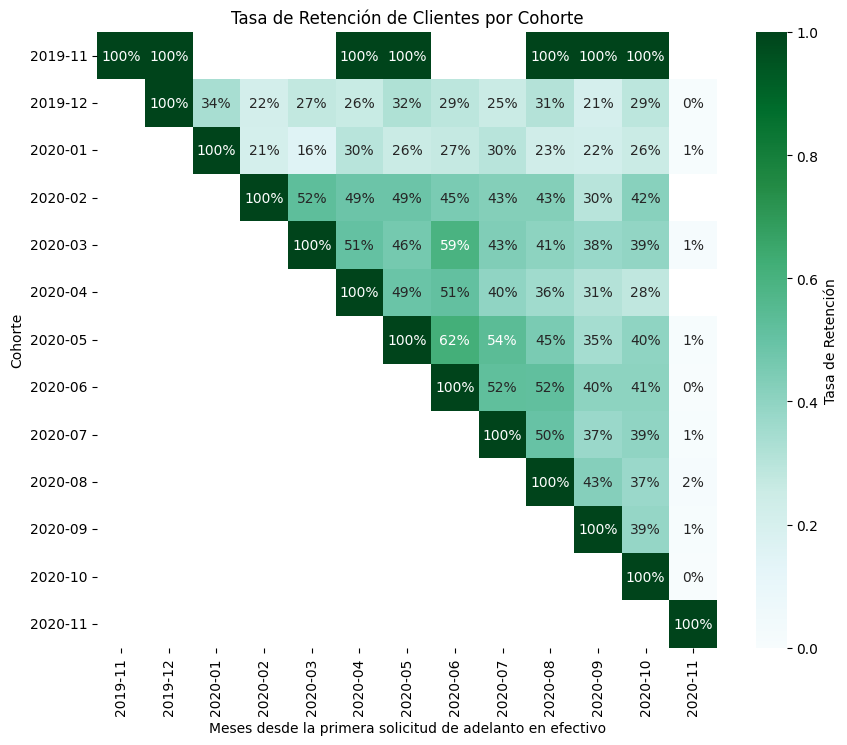

In [11]:
# Visualizar la tasa de retención de clientes usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Clientes por Cohorte')
sns.heatmap(data=retention_clientes, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()


In [13]:
# Calcular la tasa de abandono de clientes (1 - tasa de retención)
churn_clientes = 1 - retention_clientes


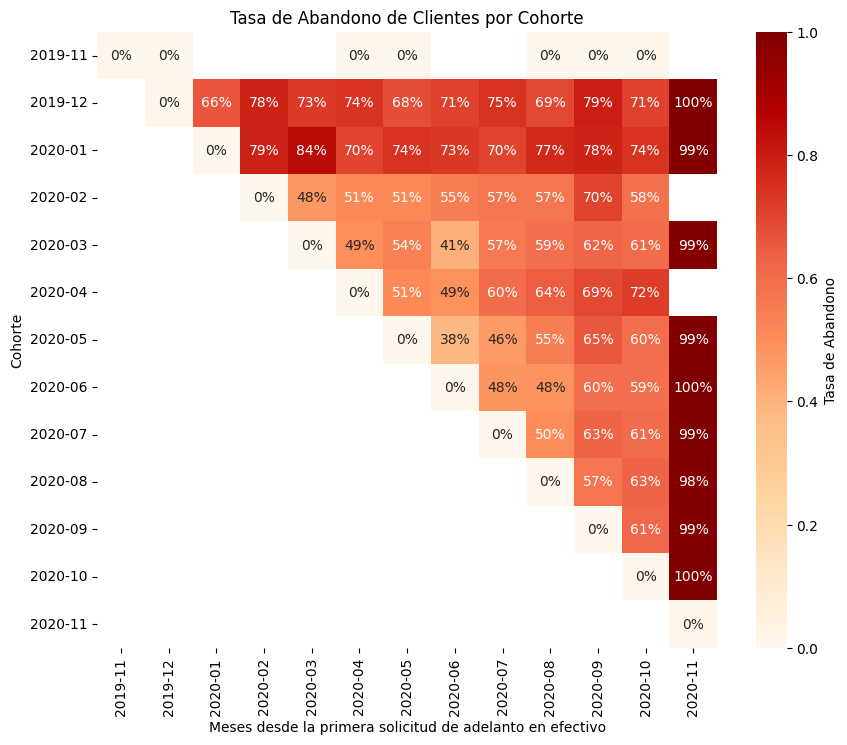

In [14]:

plt.figure(figsize=(10, 8))
plt.title('Tasa de Abandono de Clientes por Cohorte')
sns.heatmap(data=churn_clientes, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,cmap='OrRd', cbar_kws={'label': 'Tasa de Abandono'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()


In [15]:
# Calcular el número inicial de solicitudes de adelanto de efectivo en cada cohorte
cohort_cash_initial = cohort_cash_monthly.groupby('Cohorte').first().reset_index().rename(columns={'Num_Solicitudes':'Num_Solicitudes_Iniciales'})
cohort_cash_initial


,Cohorte,Mes,Num_Solicitudes_Iniciales
0,2019-11,2019-11,1
1,2019-12,2019-12,229
2,2020-01,2020-01,101
3,2020-02,2020-02,90
4,2020-03,2020-03,78
5,2020-04,2020-04,229
6,2020-05,2020-05,409
7,2020-06,2020-06,1658
8,2020-07,2020-07,1736
9,2020-08,2020-08,894


In [16]:
# Calcular la tasa de retención de solicitudes (solicitudes por cohorte en cada mes / solicitudes iniciales de la cohorte)
retention_cash = cohort_cash_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Solicitudes')
retention_cash = retention_cash.div(cohort_cash_initial.set_index('Cohorte')['Num_Solicitudes_Iniciales'], axis=0)
retention_cash

Mes,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,2.000000,NaN
2019-12,NaN,1.0,0.327511,0.200873,0.288210,0.288210,0.323144,0.331878,0.275109,0.331878,0.218341,0.310044,0.004367
2020-01,NaN,NaN,1.000000,0.207921,0.148515,0.346535,0.267327,0.247525,0.277228,0.217822,0.217822,0.237624,0.009901
2020-02,NaN,NaN,NaN,1.000000,0.533333,0.533333,0.488889,0.466667,0.411111,0.500000,0.300000,0.466667,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.500000,0.525641,0.551282,0.435897,0.384615,0.346154,0.384615,0.012821
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.572052,0.580786,0.423581,0.432314,0.340611,0.318777,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.669927,0.581907,0.498778,0.381418,0.403423,0.007335
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.558504,0.520507,0.384801,0.375151,0.002413
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.493088,0.326037,0.328341,0.004032


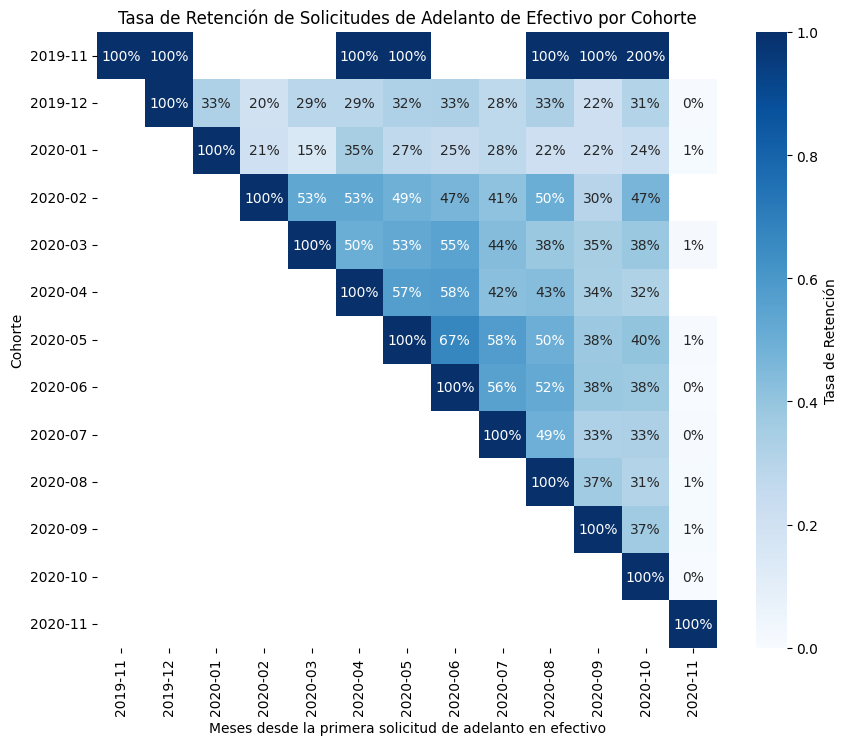

In [17]:
# Visualizar la tasa de retención de solicitudes usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Solicitudes de Adelanto de Efectivo por Cohorte')
sns.heatmap(data=retention_cash, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='Blues', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()

In [18]:
# Calcular la tasa de abandono de solicitudes (1 - tasa de retención de solicitudes)
churn_cash = 1 - retention_cash
churn_cash

Mes,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,-1.000000,NaN
2019-12,NaN,0.0,0.672489,0.799127,0.711790,0.711790,0.676856,0.668122,0.724891,0.668122,0.781659,0.689956,0.995633
2020-01,NaN,NaN,0.000000,0.792079,0.851485,0.653465,0.732673,0.752475,0.722772,0.782178,0.782178,0.762376,0.990099
2020-02,NaN,NaN,NaN,0.000000,0.466667,0.466667,0.511111,0.533333,0.588889,0.500000,0.700000,0.533333,NaN
2020-03,NaN,NaN,NaN,NaN,0.000000,0.500000,0.474359,0.448718,0.564103,0.615385,0.653846,0.615385,0.987179
2020-04,NaN,NaN,NaN,NaN,NaN,0.000000,0.427948,0.419214,0.576419,0.567686,0.659389,0.681223,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.330073,0.418093,0.501222,0.618582,0.596577,0.992665
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.441496,0.479493,0.615199,0.624849,0.997587
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.506912,0.673963,0.671659,0.995968


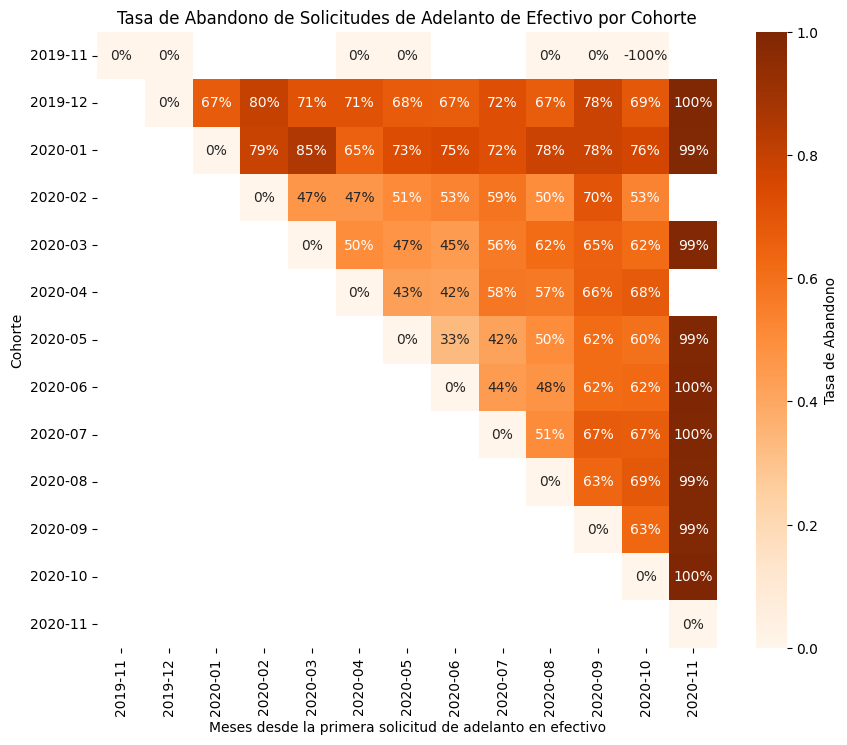

In [19]:
# Visualizar la tasa de abandono de solicitudes usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Abandono de Solicitudes de Adelanto de Efectivo por Cohorte')
sns.heatmap(data=churn_cash, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='Oranges', cbar_kws={'label': 'Tasa de Abandono'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()

In [20]:
# Cargar el dataset de tarifas o fees para análisis de cohortes de tarifas
fees = pd.read_csv('../data/extract - fees - data analyst - .csv')
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [21]:
# Crear una copia del DataFrame para preservar el original
fs = fees.copy()
fs = fs[["cash_request_id", "total_amount", "created_at"]]
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cash_request_id  21057 non-null  float64
 1   total_amount     21061 non-null  float64
 2   created_at       21061 non-null  object 
dtypes: float64(2), object(1)
memory usage: 493.7+ KB


In [22]:
# Convertir la columna 'created_at' en fees a tipo datetime para análisis temporal
fs['created_at'] = pd.to_datetime(fs['created_at'])
fs.head()

,cash_request_id,total_amount,created_at
0,14941.0,5.0,2020-09-07 10:47:27.423150+00:00
1,11714.0,5.0,2020-09-09 20:51:17.998653+00:00
2,23371.0,5.0,2020-10-23 10:10:58.352972+00:00
3,26772.0,5.0,2020-10-31 15:46:53.643958+00:00
4,19350.0,5.0,2020-10-06 08:20:17.170432+00:00


In [23]:
# Convertir la columna 'created_at' a una fecha sin zona horaria
fs['created_at'] = fs['created_at'].dt.tz_localize(None)
fs.head()

,cash_request_id,total_amount,created_at
0,14941.0,5.0,2020-09-07 10:47:27.423150
1,11714.0,5.0,2020-09-09 20:51:17.998653
2,23371.0,5.0,2020-10-23 10:10:58.352972
3,26772.0,5.0,2020-10-31 15:46:53.643958
4,19350.0,5.0,2020-10-06 08:20:17.170432


In [ ]:
# Crear columna 'Mes' indicando el mes de cada solicitud
fs['Mes'] = fs['created_at'].dt.to_period('M')
fs.head()

In [ ]:
# Crear columna 'Cohorte' que indica el mes del primer cargo de cada cliente
fs['Cohorte'] = fs.groupby('cash_request_id')['created_at'].transform('min').dt.to_period('M')
fs.head()

In [ ]:
# Calcular la cantidad de tarifas iniciales por cohorte
cohort_fees_initial = fs.groupby('Cohorte').agg(Num_Tarifas_Iniciales=('cash_request_id', 'nunique')).reset_index()
cohort_fees_initial

In [ ]:
# Calcular el número de tarifas en cada cohorte para cada mes
cohort_fees_monthly = fs.groupby(['Cohorte', 'Mes']).agg(Num_Tarifas=('cash_request_id', 'nunique')).reset_index()
cohort_fees_monthly

In [ ]:
# Calcular la tasa de retención de tarifas (número de tarifas de cada cohorte en cada mes / tarifas iniciales de la cohorte)
retention_fees = cohort_fees_monthly.pivot(index='Cohorte', columns='Mes',values='Num_Tarifas')
retention_fees = retention_fees.div(cohort_fees_initial.set_index('Cohorte')['Num_Tarifas_Iniciales'], axis=0)
retention_fees

In [ ]:
# Visualizar la tasa de retención de tarifas usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Tarifas por Cohorte')
sns.heatmap(data=retention_fees, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,cmap='Greens', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Meses desde la primera tarifa')
plt.ylabel('Cohorte')
plt.show()


In [ ]:
churn_fees = 1 - retention_fees

plt.figure(figsize=(10, 8))
plt.title('Tasa de Abandono de Tarifas por Cohorte')
sns.heatmap(data=churn_fees, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,cmap='Reds', cbar_kws={'label': 'Tasa de Abandono'})
plt.xlabel('Meses desde la primera tarifa')
plt.ylabel('Cohorte')
plt.show()

In [ ]:
# Agregar columnas de temporalidad
# Semana y mes de la solicitud
cr['Semana_Mes'] = cr['created_at'].dt.strftime('%U_%B') + '_' + cr['Mes'].dt.strftime('%Y')
# Día y semana de la solicitud
cr['Dia_Semana'] = cr['created_at'].dt.strftime('%A') + '_' + cr['Semana_Mes']
# Hora y dia de la solicitud
cr['Hora_Dia'] = cr['created_at'].dt.hour.astype(str) + '_' + cr['Dia_Semana']
cr.head()

In [ ]:
# Calcular la cantidad de adelanto de efectivo por cohorte y mes
cohort_revenue = cr.groupby(['Cohorte', 'Mes'])['amount'].sum().reset_index()
cohort_revenue = cohort_revenue.pivot(index='Cohorte', columns='Mes', values='amount')
cohort_revenue

In [ ]:
# Graficar la cantidad de adelanto de efectivo por cohorte y mes
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo por Cohorte y Mes')
sns.heatmap(data=cohort_revenue, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Mes por Año')
plt.ylabel('Cohorte')
plt.show()


In [ ]:
# Crear DataFrame de cohortes para el mes de '2020-03'
cohort_amount_2020_03 = cr[cr['Cohorte'] == '2020-03'].groupby('user_id')['amount'].sum().reset_index()
cohort_amount_2020_03

In [ ]:
# Ordenar por el monto total para encontrar los 10 usuarios principales
sort_cohort_amount_2020_03 = cohort_amount_2020_03.sort_values(by='amount', ascending=False)
top_10_users = sort_cohort_amount_2020_03.head(10)
top_10_users

In [ ]:
# Filtrar para incluir solo los 10 usuarios seleccionados
amount_2020_03 = cr[cr['Cohorte'] == '2020-03'].groupby(['user_id','Mes'])['amount'].sum().reset_index()
cohort_amount_2020_03_top10 = amount_2020_03[amount_2020_03['user_id'].isin(top_10_users['user_id'])]
cohort_amount_2020_03_top10 = cohort_amount_2020_03_top10.pivot(index='user_id', columns='Mes', values='amount')
cohort_amount_2020_03_top10

In [ ]:
# Graficar la cantidad de adelanto de efectivo de un cohorte por meses y número de usuarios
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo del Cohorte 2020-03 por Meses por Año y Número de Usuario')
sns.heatmap(data=cohort_amount_2020_03_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Mes por Año')
plt.ylabel('Número de Usuario')
plt.show()


In [ ]:
# Filtrar para calcular la cantidad de adelanto de efectivo por cohorte y semana
cohort_weekly_amount = cr[cr['Cohorte'] == '2020-03'].groupby(['user_id','Semana_Mes'])['amount'].sum().reset_index()
cohort_weekly_amount

In [ ]:
# Filtrar para incluir solo los 10 usuarios seleccionados
cohort_weekly_amount_top10 = cohort_weekly_amount[cohort_weekly_amount['user_id'].isin(top_10_users['user_id'])]
cohort_weekly_amount_top10 = cohort_weekly_amount_top10.pivot(index='user_id', columns='Semana_Mes', values='amount')
cohort_weekly_amount_top10

In [ ]:
# Seleccionar las primeras 10 semanas
cohort_weekly_amount_top10 = cohort_weekly_amount_top10.loc[:,cohort_weekly_amount_top10.columns[:10]]
cohort_weekly_amount_top10

In [ ]:
# Graficar la cantidad de adelanto de efectivo de los 10 principales usuarios por semana
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo del Cohorte 2020-03 por Semana por Mes y Número de Usuario')
sns.heatmap(data=cohort_weekly_amount_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Semana por Mes')
plt.ylabel('Número de Usuario')
plt.show()



In [ ]:
# Filtrar para calcular la cantidad de adelanto de efectivo por cohorte y día de la semana
cohort_daily_amount = cr[ (cr['Cohorte'] == '2020-03') & (cr['Semana_Mes'] == '10_March_2020') ].groupby(['user_id', 'Dia_Semana'])['amount'].sum().reset_index()
cohort_daily_amount

In [ ]:
# Filtrar para incluir solo los 10 usuarios seleccionados
cohort_daily_amount_top10 = cohort_daily_amount[cohort_daily_amount['user_id'].isin(top_10_users['user_id'])]
cohort_daily_amount_top10 = cohort_daily_amount_top10.pivot(index='user_id',columns='Dia_Semana', values='amount')
cohort_daily_amount_top10

In [ ]:
# Graficar la cantidad de adelanto de efectivo de los 10 principales usuarios por día de la semana
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo del Cohorte 2020-03 por Día por Semana y Número de Usuario')
sns.heatmap(data=cohort_daily_amount_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Día por Semana')
plt.ylabel('Número de Usuario')
plt.show()



In [ ]:
# Filtrar para calcular la cantidad de adelanto de efectivo por cohorte y hora
cohort_hourly_amount = cr[(cr['Cohorte'] == '2020-03') & 
                          (cr['Semana_Mes'] == '10_March_2020') & 
                          (cr['Dia_Semana'] == 'Monday_10_March_2020')].groupby(['user_id', 'Hora_Dia'])['amount'].sum().reset_index()
cohort_hourly_amount

In [ ]:
# Filtrar para incluir solo los 10 usuarios seleccionados
cohort_hourly_amount_top10 = cohort_hourly_amount[cohort_hourly_amount['user_id'].isin(top_10_users['user_id'])]
cohort_hourly_amount_top10 = cohort_hourly_amount_top10.pivot(index='user_id',columns='Hora_Dia', values='amount')
cohort_hourly_amount_top10

In [ ]:
# Graficar la cantidad de adelanto de efectivo de los 10 principales usuarios por hora
plt.figure(figsize=(10, 8))
plt.title('Cantidad de Adelanto de Efectivo del Cohorte 2020-03 por Hora por Dia y Número de Usuario')
sns.heatmap(data=cohort_hourly_amount_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Cantidad de Adelanto de Efectivo'})
plt.xlabel('Hora por Dia')
plt.ylabel('Número de Usuario')
plt.show()

In [ ]:
# Importando la biblioteca pandas para manipulación y análisis de datos
import pandas as pd
# Importando NumPy para operaciones numéricas y manipulación de arreglos
import numpy as np
# Importando Seaborn para visualización de datos estadísticos (opcional, pero puede complementar a Plotly)
import seaborn as sns
# Importando Plotly Express para visualizaciones interactivas de alto nivel y fáciles de usar
import plotly.express as px
# Importando matplotlib.pyplot para crear gráficos y visualizaciones

import matplotlib.pyplot as plt
# Importando Plotly Graph Objects para un control más detallado sobre las visualizaciones
import plotly.graph_objects as go
# Importando itertools para generar combinaciones de columnas
import itertools
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
cash_request=pd.read_csv('../data/extract - cash request - data analyst.csv')
fees=pd.read_csv('../data/extract - fees - data analyst - .csv')

fig1 = px.imshow(cash_request.isnull(),
color_continuous_scale=['black', 'red'],
labels=dict(color="NaN"),
title="Mapa de calor para cash_request")
fig1.update_layout(width=700, height=700)
fig1.update_coloraxes(showscale=False)
fig1.show()


In [ ]:
fig2 = px.imshow(fees.isnull(),
color_continuous_scale=['black', 'red'],
labels=dict(color="NaN"),
title="Mapa de calor para fees")
fig2.update_layout(width=700, height=700)
fig2.update_coloraxes(showscale=False)
fig2.show()


In [ ]:
cash_request.describe()

In [ ]:
fees.describe()

In [ ]:
cash_request.info()

In [ ]:
fees.info()

In [ ]:
#Revisión de columnas con valores clave
columnas_cash_request=cash_request.columns.tolist()
for i in columnas_cash_request:
    print("===========================")
    print(f"{cash_request[i].value_counts().head(10)}")

In [ ]:
columnas_fees=fees.columns.tolist()
for i in columnas_fees:
    print("===========================")
    print(f"{fees[i].value_counts().head(10)}")

In [ ]:
# Visualización de distribuciones de datos
columnas_numericas_cash_request=cash_request.describe().columns.tolist()
for c in columnas_numericas_cash_request:
    fig = px.histogram(cash_request, x=c, title=f'Histograma de {c}')
    fig.update_layout(height=500)
    fig.show()


In [ ]:
columnas_numericas_fees=fees.describe().columns.tolist()
for c in columnas_numericas_fees:
    fig = px.histogram(fees, x=c, title=f'Histograma de {c}')
    fig.update_layout(height=500)
    fig.show()


In [ ]:
for c in columnas_cash_request:
    if c not in columnas_numericas_cash_request:
        counts = cash_request[c].value_counts()
        if len(counts)<=10:
            fig = px.pie(names=counts.index, values=counts.values, title=f'Distribución de {c}')
            fig.update_layout(height=500)
            fig.show()

In [ ]:
for c in columnas_fees:
    if c not in columnas_numericas_fees:
        counts = fees[c].value_counts()
        if len(counts)<=10:
            fig = px.pie(names=counts.index, values=counts.values, title=f'Distribución de {c}')
            fig.update_layout(height=500)
            fig.show()



In [ ]:
for c in columnas_numericas_cash_request:
    fig = px.box(cash_request, y=c, title=f'Boxplot de {c}')
    fig.update_layout(height=500)
    fig.show()


In [ ]:
for c in columnas_numericas_fees:
    fig = px.box(fees, y=c, title=f'Boxplot de {c}')
    fig.update_layout(height=500)
    fig.show()


In [ ]:
for c in columnas_numericas_cash_request:
    fig = px.violin(cash_request, y=c, title=f'Violinplot de {c}')
    fig.update_layout(height=500)
    fig.show()


In [ ]:
for c in columnas_numericas_fees:
    fig = px.violin(fees, y=c, title=f'Violinplot de {c}')
    fig.update_layout(height=500)
    fig.show()

In [ ]:
# Genera gráficos de dispersión para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_cash_request, 2):
    fig = px.scatter(cash_request, x=c1, y=c2, title=f'Gráfico de dispersión de {c1} vs {c2}')
    fig.update_layout(height=500)
    fig.show()



In [ ]:
# Genera gráficos de dispersión con línea de tendencia para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_cash_request, 2):
    fig = px.scatter(cash_request, x=c1, y=c2,
    title=f'Gráfico de dispersión de {c1} vs {c2} con línea de tendencia',
    trendline="ols") # Agregar línea de tendencia (OLS)
    # Cambiar el color de la línea de tendencia a rojo
    fig.update_traces(line=dict(color='red', width=3)) # Color y ancho de la línea de tendencia
    fig.update_traces(line=dict(color='red'), selector=dict(mode='lines')) #Cambiar el color de la línea de tendencia
    fig.update_layout(height=500)
    fig.show()

In [ ]:
# Genera gráficos de dispersión con línea de tendencia para todas las combinaciones de columnas numéricas
for c1, c2 in itertools.combinations(columnas_numericas_fees, 2):
    fig = px.scatter(fees, x=c1, y=c2,

    title=f'Gráfico de dispersión de {c1} vs {c2} con línea de tendencia',
    trendline="ols") # Agregar línea de tendencia (OLS)
    # Cambiar el color de la línea de tendencia a rojo
    fig.update_traces(line=dict(color='red', width=3)) # Color y ancho de la línea de tendencia
    fig.update_traces(line=dict(color='red'), selector=dict(mode='lines')) #Cambiar el color de la línea de tendencia
    fig.update_layout(height=500)
    fig.show()

In [ ]:
#cash_request=pd.read_csv('../data/extract - cash request - data analyst.csv')
#cash_request.info()
cash_request.describe()
#cr_cp = cash_request.copy()
#cr_num=cr_cp.describe().columns#.tolist()
#print(cr_num)

In [ ]:
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas_cash_request:
    # Crear una copia del DataFrame para trabajar
    cash_request_copy = cash_request[c].copy()
    
    # Verifica si hay valores faltantes y elimínalos o interpola
    if cash_request_copy.isnull().any():
        cash_request_copy = cash_request_copy.interpolate() # Rellenar NaN con interpolación
    
    # Eliminar filas con valores faltantes
    cash_request_copy = cash_request_copy.dropna()
    # Verificar que no hay valores no finitos
    if not np.isfinite(cash_request_copy).all():
        print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
        continue
    # Descomposición de la serie temporal
    descomposicion = seasonal_decompose(cash_request_copy, model='additive', period=12)
    # Graficar la descomposición
    fig = descomposicion.plot()
    # Ajustar el tamaño de la figura con matplotlib
    46
    plt.gcf().set_size_inches(10, 6)
    # Ajustar el título para que no se superponga
    fig.suptitle(f'Descomposición de la serie temporal de {c}', fontsize=16, y=1.05)
    plt.show()

In [ ]:
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas_fees:
    # Crear una copia del DataFrame para trabajar
    fees_copy = fees[c].copy()
    # Verifica si hay valores faltantes y elimínalos o interpola
    if fees_copy.isnull().any():
        fees_copy = fees_copy.interpolate() # Rellenar NaN con interpolación
    
    # Eliminar filas con valores faltantes
    fees_copy = fees_copy.dropna()
    # Verificar que no hay valores no finitos
    if not np.isfinite(fees_copy).all():
        print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
        continue
    # Descomposición de la serie temporal
    descomposicion = seasonal_decompose(fees_copy, model='additive', period=12)
    # Graficar la descomposición
    fig = descomposicion.plot()
    49
    # Ajustar el tamaño de la figura con matplotlib
    plt.gcf().set_size_inches(10, 6) #
    # Ajustar el título para que no se superponga
    fig.suptitle(f'Descomposición de la serie temporal de {c}', fontsize=16, y=1.05)
    plt.show()